In [1]:
"""
The answer to the first of three why questions!
Why can inventors not achieve the optimal distance?
"""

'\nThe answer to the first of three why questions!\nWhy can inventors not achieve the optimal distance?\n'

In [2]:
import os
import pandas as pd
import numpy as np
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
from numba import njit
import pickle
from operator import itemgetter

In [3]:
os.chdir("D:\\IDEA Masters\\TFM data\\Paper Data")

In [4]:
@njit(parallel=True)
def MeasureDist(inv1_skills, inv2_skills, adj_tech):

    g = np.outer(np.transpose(inv1_skills), inv2_skills) * adj_tech
    g = np.where(g == 0, np.nan, g)
    average = np.nanmean(g)

    return  average

In [ ]:
graph = nx.read_gml("Technology Network from PS.gml")
adj_tech = nx.to_numpy_array(graph, nodelist=graph.nodes)
np.fill_diagonal(adj_tech, 1)

In [5]:
data = pd.read_csv("Collaborations 2003 to 2018.csv")

In [6]:
len(data["inventor_id"].unique())

1871197

In [7]:
"""
Choose a random selection of inventors who have produced patents

The total number of inventors does not match average * number of patents because people repeat!

"""
np.random.seed(768)

section_data = data[data["year"].isin([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])]
section_data = section_data.dropna(subset=["inventor_distance"])
chosen_patents = np.random.choice(a=section_data["patent_id"].unique(), size=36500)
idx = section_data.index[section_data["patent_id"].isin(chosen_patents)]
section_data = section_data.loc[idx]
print("The total number of inventors is, ", len(section_data["inventor_id"].unique()))
print("The number of patents is, ", len(section_data["patent_id"].unique()))

The total number of inventors is,  100129
The number of patents is,  35416


In [8]:
del data

In [10]:
print("The average colab size is ", np.round(np.mean(section_data["no_inventors"])))

The average colab size is  6.0


In [11]:
"""
Randomly match inventors into the same number of collaborations with the same mean inventor size
"""

'\nRandomly match inventors into the same number of collaborations with the same mean inventor size\n'

In [13]:
observed_distances = section_data[["patent_id", "inventor_id", "inventor_distance", "year", "team_prox",
                                   "diameter", "path_prox_fraction", "no_skill_groups"]]
observed_distances = observed_distances.drop_duplicates()

print("The total number of inventors is, ", len(observed_distances["inventor_id"].unique()))
print("The number of patents is, ", len(observed_distances["patent_id"].unique()))

colab_count = len(observed_distances["patent_id"].unique())
random_distances = []

years = [2003, 2004, 2005, 2006, 2007, 2008, 2009]


The total number of inventors is,  100129
The number of patents is,  35416


In [15]:
%%time

warnings.filterwarnings("ignore")
for year in years:

    section_counts = pd.read_csv(f"Section Counts {year-1}.csv")
    section_counts = section_counts[[c for c in graph.nodes()]]

    pat = 1
    while pat < colab_count/9:

        inventors = np.random.choice(observed_distances[observed_distances["year"] == year]["inventor_id"].unique(),
                                     size=int(np.round(np.mean(section_data["no_inventors"]))))
        distances = []
        for (inv1, inv2) in combinations(inventors, 2):

                inv1_skills = np.array(section_counts.loc[inv1])
                inv2_skills = np.array(section_counts.loc[inv2])

                average = MeasureDist(inv1_skills, inv2_skills, adj_tech)
                distances.append(average)

        random_distances.append(np.nanmean(distances))

        pat = pat + 1

    print(year)
    del section_counts

warnings.filterwarnings("default")

2003
2004
2005
2006
2007
2008
2009
Wall time: 1h 20min 33s


'\nadj_tech_top = nx.read_graphml("adj_tech_top.graphml")\nos.chdir("D:\\IDEA Masters\\TFM data\\Paper Data")\nsubclass_dict = dict(zip(np.arange(634), graph.nodes))\nmodularity_data = pd.read_csv("Tech Network Top Links modularity.csv")\nskill_group_dict = dict(zip(modularity_data["Label"], modularity_data["modularity_class"]))\nreverse_subclass_dict = {k : l for l, k in subclass_dict.items()}\n\nwarnings.filterwarnings("ignore")\nfor year in years:\n\n    section_counts = pd.read_csv(f"Section Counts {year-1}.csv")\n    section_counts = section_counts[[c for c in graph.nodes()]]\n\n    pat = 1\n    while pat < colab_count/9:\n\n        team_members = np.random.choice(observed_distances[observed_distances["year"] == year]["inventor_id"].unique(),\n                                     size=int(np.round(np.mean(section_data["no_inventors"]))))\n        team_skills = np.zeros((1, 634))\n\n        for member in team_members:\n\n            team_skills = team_skills + np.array(section_coun

In [17]:
print("The random mean is, ", np.nanmean(random_distances))

print("The observed mean of inventor distance is, ", np.nanmean(observed_distances["inventor_distance"]))

print("The observed mean of team prox is, ", np.nanmean(observed_distances["team_prox"]))


The random mean is,  1.0928159848810515
The observed mean of inventor distance is,  0.4327950847169997
The observed mean of team prox is,  0.43701843698310366


C:\ProgramData\Anaconda3\envs\pythonProject\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
os.chdir("D:\\IDEA Masters\\TFM data\\Paper Data")

C:\ProgramData\Anaconda3\envs\pythonProject\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\ProgramData\Anaconda3\envs\pythonProject\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-19-1e8cf0ab129c>:1: ResourceWarning: unclosed file <_io.BufferedReader name='random distances All.p'>
  random_distances = pickle.load(open("random distances All.p", "rb"))
C:\Users\Joe's PC\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:509: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  scout = self.ax.fill_between([], [], color=color, **plot_kws)
C:\Users\Joe's PC\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions

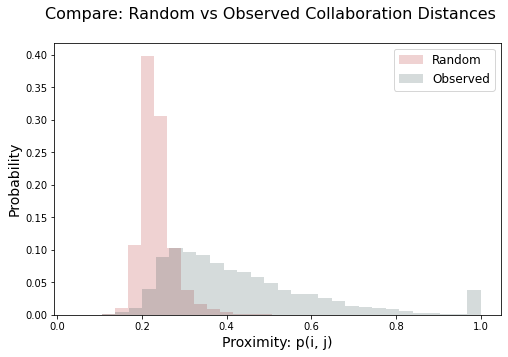

In [19]:
random_distances = pickle.load(open("random distances All.p", "rb"))

fig, ax = plt.subplots(facecolor="w", figsize=(8,5))
plt.suptitle("Compare: Random vs Observed Collaboration Distances", fontsize=16)
sns.histplot(random_distances, color="firebrick", stat="probability", ax=ax, bins=30, alpha=0.2, edgecolor="", label="Random")
sns.histplot(observed_distances["inventor_distance"], color="darkslategray", stat="probability",
             ax=ax, bins=30, alpha=0.2, edgecolor="", label="Observed")
plt.xlabel("Proximity: p(i, j)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(fontsize="large")
#fig.savefig("Random vs Observed All.png", dpi=300)
plt.show()

In [20]:
pickle.dump(random_distances, open("random distances 03 18.p", "wb"))

C:\ProgramData\Anaconda3\envs\pythonProject\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-20-6344fffd9032>:39: ResourceWarning: unclosed file <_io.BufferedWriter name='random distances 03 18.p'>
  pickle.dump(random_distances, open("random distances 03 18.p", "wb"))


In [22]:
"""
Show that within local neighborhoods, people are connected to people closer to them on the tech network.
"""

collaboration_links = []

for (id, patent) in section_data[section_data["year"].isin([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009])].groupby("patent_id"):

    collaboration_links = collaboration_links + [combo for combo in combinations(patent["inventor_id"].unique(), 2)]

collaboration_links = set(collaboration_links)


g_colab = nx.Graph()
for (u, v) in collaboration_links:
    g_colab.add_edge(u, v)

C:\ProgramData\Anaconda3\envs\pythonProject\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
"""
Run the FGL methodology
"""

paths = dict(nx.all_pairs_shortest_path_length(g_colab))

In [25]:
lengths_a = []

for inventor in g_colab.nodes:
    d = paths[inventor]

    for path in [dval for dval in d.values()]:
        if path >= 1:
            lengths_a.append(path)


In [26]:
nx.write_graphml(g_colab, "g_colab 03 18.graphml")

In [28]:

bins = np.arange(1, np.max(lengths_a)+1)
hist_a = np.histogram(lengths_a, bins=bins)

collaboration_links = []

for (id, patent) in section_data[section_data["year"] == 2010].groupby("patent_id"):

    collaboration_links = collaboration_links + [combo for combo in combinations(patent["inventor_id"].unique(), 2)]

collaboration_links = set(collaboration_links)

g_colab_2018 = nx.Graph((x, y) for (x, y) in collaboration_links)

node_deleted = []
node_dict = g_colab_2018.nodes
for node in node_dict:
    if node not in g_colab.nodes:
        node_deleted.append(node)

print("Number of deleted nodes: ", len(node_deleted))


g_colab_2018.remove_nodes_from(node_deleted)

"""
Drop all edges which are repeat collaborations from the previous 5 years. We only want new collaborations.

new_colabs = []
for edge in g_colab_2018.edges:
    if edge not in g_colab.edges:
        new_colabs.append(edge)

"""
lengths_b = []
for (inv1, inv2) in g_colab_2018.edges:
    if nx.has_path(g_colab, source=inv1, target=inv2):
        paths = nx.shortest_path_length(g_colab, source=inv1, target=inv2)
        lengths_b.append(paths)


Number of deleted nodes:  16229


In [29]:
del collaboration_links

C:\ProgramData\Anaconda3\envs\pythonProject\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
bins_b = np.arange(1, np.max(lengths_a)+1)
hist_b = np.histogram(lengths_b, bins=bins_b)
conditional = hist_b[0] / hist_a[0]

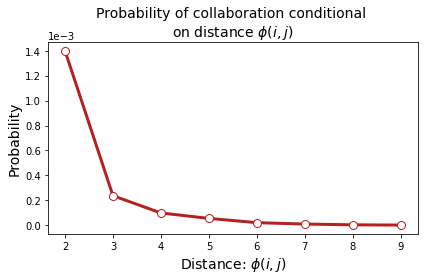

In [31]:
fig, ax = plt.subplots(facecolor="w")
plt.plot(np.arange(2, 10), conditional[1:9], color="firebrick", lw=3,marker='o', markersize=8, markerfacecolor='white')
plt.title("Probability of collaboration conditional \n" + r"on distance $\phi(i, j)$", fontsize=14)
#plt.text(x=-2, y=-0.0006, s="Probability of (i, j) collaborating conditional on distance \n "
                          #r"between i and j, $\phi(i, j)$, on the existing collaboration network", fontsize=12)

plt.ylabel("Probability", fontsize=14)
#plt.xticks(np.arange(9), np.arange(1, 11))
#plt.yticks([ 0.    ,  0.0001,  0.0002,  0.0003,  0.0004,  0.0005,
 #        0.0006,  0.0007,  0.0008,  0.0009],
  # np.round(np.array([ 0.    ,  0.0001,  0.0002,  0.0003,  0.0004,  0.0005,
   #      0.0006,  0.0007,  0.0008,  0.0009])*10, 4))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
#plt.ylim((-0.00008, 0.0016))
plt.tight_layout()
plt.xlabel(r"Distance: $\phi(i, j)$", fontsize=14)
plt.tight_layout()
#fig.savefig("Conditional Probability All", dpi=300)
#plt.yticks()

In [32]:
pickle.dump(conditional, open("conditional All.p", "wb"))
pickle.dump(lengths_a, open("lengths_a All.p", "wb"))
pickle.dump(lengths_b, open("lengths_b All.p", "wb"))

C:\ProgramData\Anaconda3\envs\pythonProject\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-32-bd682d9d333c>:1: ResourceWarning: unclosed file <_io.BufferedWriter name='conditional 03 18.p'>
  pickle.dump(conditional, open("conditional 03 18.p", "wb"))


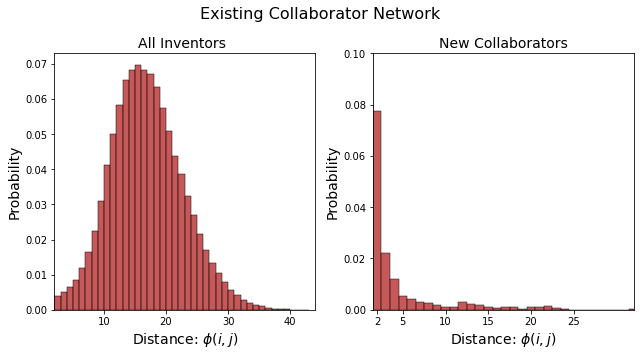

In [15]:
selected_lens = np.random.choice(lengths_a, 600000)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, facecolor="w", figsize=(9, 5))
fig.suptitle("Existing Collaborator Network", fontsize=16)

#All inventors
sns.histplot(selected_lens, stat="probability", bins=np.arange(np.max(selected_lens)),
             color="firebrick", ax=ax1)
ax1.set_title("All Inventors ", fontsize=14)
ax1.set_xlabel(r"Distance: $\phi(i, j)$", fontsize=14)
ax1.set_ylabel("Probability", fontsize=14)
ax1.set_xlim((2, np.max(selected_lens)))
#Collaborating inventors

sns.histplot(lengths_b, stat="probability", bins=np.arange(-0.5, np.max(selected_lens)+1, 1), color="firebrick", ax=ax2)
ax2.set_title("New Collaborators", fontsize=14)
ax2.set_xlabel(r"Distance: $\phi(i, j)$", fontsize=14)
ax2.set_ylabel("Probability", fontsize=14)
ax2.set_xlim((1.5, np.max(lengths_b)))
ax2.set_xticks([2, 5, 10, 15, 20, 25])
ax2.set_ylim((0, 0.1))
plt.tight_layout()
#fig.savefig("Existing Collaborator Network All.png", dpi=300)



In [37]:
del lengths_a

C:\ProgramData\Anaconda3\envs\pythonProject\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
collaboration_links = []

for (id, patent) in section_data[section_data["year"] == 2010].groupby("patent_id"):

    collaboration_links = collaboration_links + [combo for combo in combinations(patent["inventor_id"].unique(), 2)]

collaboration_links = set(collaboration_links)

g_colab_2018_copy = nx.Graph((x, y) for (x, y) in collaboration_links)


In [40]:
section_counts = pd.read_csv("Section Counts 2009.csv")
section_counts = section_counts[[c for c in graph.nodes()]]

In [ ]:
%%time

@njit(parallel=True)
def MeasureDist(inv1_skills, inv2_skills, adj_tech):

    g = np.outer(np.transpose(inv1_skills), inv2_skills) * adj_tech
    g = np.where(g == 0, np.nan, g)

    return  np.nanmean(g)

radi = list(range(1, 35))
random_invs = np.random.choice(g_colab.nodes, 25000)
radi_mean = []
radi_counts = {}
for radius in radi:

    radi_count = 0
    mean_weights_radius = []

    for inv1 in random_invs:
        paths = nx.single_source_shortest_path_length(g_colab, inv1)
        radius_paths = [k for k,v in paths.items() if v == radius]
        inv1_skills = np.array(section_counts.loc[inv1])
        inv1_skills[inv1_skills > 0 ] = 1

        for inv2 in radius_paths:

            if inv1 != inv2:
                inv2_skills = np.array(section_counts.loc[inv2])
                inv2_skills[inv2_skills > 0 ] = 1
                proximity = MeasureDist(inv1_skills, inv2_skills, adj_tech)
                mean_weights_radius.append(proximity)
                radi_count = radi_count + 1

    radi_counts.update({radius : radi_count})
    avg = np.nanmean(mean_weights_radius)
    radi_mean.append(avg)

    print(radius, avg)

In [42]:

pickle.dump(radi_mean, open(f"radi_mean 03 18.p", "wb"))

C:\ProgramData\Anaconda3\envs\pythonProject\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


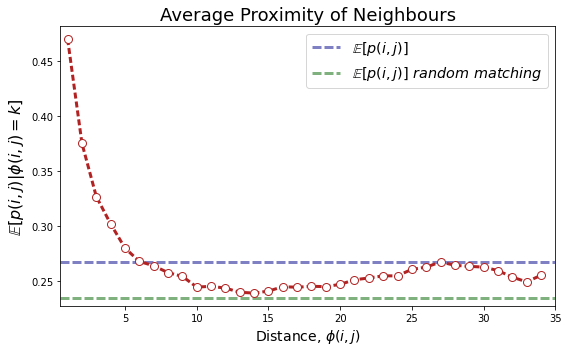

In [26]:
random_distances = pickle.load(open("random distances All.p", "rb"))
radi_mean = pickle.load(open("radi_mean All.p", "rb"))

radi = list(range(1, 35))
fig, ax1 = plt.subplots(facecolor="w", figsize=(8, 5))
ax1.plot(radi, radi_mean, color="firebrick", lw=3, marker='o',  markersize=8,
         markerfacecolor='white', zorder=5, dashes=[2,1,2,1])
         #, label="Pr(Colab) = 0")
#plt.xticks(np.arange(1, 11), ["",2, "", 4, "", 6, "", 8, "", 10])
plt.axhline(np.nanmean(radi_mean), 0, 1, color="darkblue", alpha=0.5, dashes=[3,1,3,1],
            lw=3, zorder=1, label=r"$\mathbb{E}[p(i, j)]$")
plt.title("Average Proximity of Neighbours", fontsize=18)
plt.xlabel(r"Distance, $\phi(i, j)$", fontsize=14)
plt.ylabel(r"$\mathbb{E}[p(i, j)|\phi(i, j) = k]$", fontsize=16)
plt.axhline(np.nanmean(random_distances), 0, 1, color="darkgreen", alpha=0.5,
            dashes=[3,1,3,1], zorder=1, label=r"$ \mathbb{E}[p(i, j)] \ random \ matching$", lw=3)
plt.legend(fontsize="x-large")
plt.xlim((0.5, 35))
plt.tight_layout()
#plt.legend(fontsize="large")
fig.savefig("Expected Value from colab All.png", dpi=300)


In [91]:
"""
EXTRAS:



Build a knowledge and collab network to display
"""

C:\ProgramData\Anaconda3\envs\pythonProject\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [140]:
%%time
selected_pats = np.random.choice(section_data[section_data["year"] == 2010]["patent_id"], 150)
selected_pats = section_data[section_data["patent_id"].isin(selected_pats)]
print("No of inventors, ", len(selected_pats["inventor_id"].unique()))
collaboration_links = []

for (id, patent) in selected_pats.groupby("patent_id"):

    collaboration_links = collaboration_links + [combo for combo in combinations(patent["inventor_id"].unique(), 2)]

collaboration_links = set(collaboration_links)

g_visual_colab = nx.Graph((x, y) for (x, y) in collaboration_links)
knowledge_edges = []
for inv1 in g_visual_colab.nodes:

    select_inv_dist = []
    inv1_skills = np.array(section_counts.loc[inv1])

    for inv2 in g_visual_colab.nodes:

        if inv1 != inv2:

            inv2_skills = np.array(section_counts.loc[inv2])

            average = MeasureDist(inv1_skills, inv2_skills, adj_tech)
            select_inv_dist.append(((inv1, inv2), average))
    for pair in sorted(select_inv_dist,key=lambda x: x[1], reverse=True)[0:2]:
        knowledge_edges.append(pair)

g_visual_know = nx.Graph()
for (edge, weight) in knowledge_edges:
    (u, v) = edge
    g_visual_know.add_edge(u, v, weight=weight)

C:\ProgramData\Anaconda3\envs\pythonProject\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No of inventors,  690
Wall time: 47min 18s


In [141]:
nx.write_graphml(g_visual_know, "Visual Knowledge 2010.graphml")

C:\ProgramData\Anaconda3\envs\pythonProject\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
nx.write_graphml(g_visual_colab, "Visual Colab 2010.graphml")

In [16]:
giant_comp = nx.read_graphml("Giant Component.graphml")

In [17]:
path_len_dict = nx.shortest_path_length(giant_comp, source="fl:m_ln:ohashi-5")

In [18]:
nx.set_node_attributes(giant_comp, path_len_dict, name="length_ohashi")

In [9]:
radi_mean = pickle.load(open("radi_mean All.p", "rb"))

In [12]:
radi_mean_dict = dict(zip(np.arange(1, 35), radi_mean))
radi_mean_dict

{1: 0.4701549119946393,
 2: 0.37525677796253915,
 3: 0.3268814551672424,
 4: 0.301987447769479,
 5: 0.2800531232942496,
 6: 0.2679011676327855,
 7: 0.26394330894275086,
 8: 0.25770289252889267,
 9: 0.2543195622166063,
 10: 0.24456582633131158,
 11: 0.2452516288735968,
 12: 0.2436352090373776,
 13: 0.23986383603588368,
 14: 0.2390922711527267,
 15: 0.24092109726900998,
 16: 0.244905951850454,
 17: 0.2444340556293132,
 18: 0.24527194028237884,
 19: 0.24499415073129988,
 20: 0.2470607566008967,
 21: 0.251232780882982,
 22: 0.2528229114680879,
 23: 0.2547804160607968,
 24: 0.25478540233998553,
 25: 0.260739800473655,
 26: 0.2627297816271595,
 27: 0.2674318792545648,
 28: 0.26437900885334714,
 29: 0.2634253551756327,
 30: 0.2627468765567271,
 31: 0.2596010281268371,
 32: 0.25361563413642685,
 33: 0.24934445004488032,
 34: 0.2552521272814804}

In [21]:
exp_prox_dict = {x: radi_mean_dict[path_len_dict[x]] for x in path_len_dict if path_len_dict[x] in np.arange(1, 35)}

In [20]:
nx.set_node_attributes(giant_comp, exp_prox_dict, name="exp_prox_to_ohashi")
nx.write_graphml(giant_comp, "Giant Component.graphml")

In [ ]:
"""
Simulate distribtuion with random using the probabilities calculated conditional on path length
"""

In [6]:

conditional = pickle.load(open("conditional All.p", "rb"))
radi_mean = np.array(pickle.load(open("radi_mean All.p", "rb")))
g_colab = nx.read_graphml("g_colab 03 18.graphml")

In [7]:
conditional = conditional * 10

In [30]:
graph = nx.read_gml("Technology Network from PS.gml")
adj_tech = nx.to_numpy_array(graph, nodelist=graph.nodes)
np.fill_diagonal(adj_tech, 1)
section_counts = pd.read_csv("Section Counts 2009.csv")
section_counts = section_counts[[c for c in graph.nodes()]]

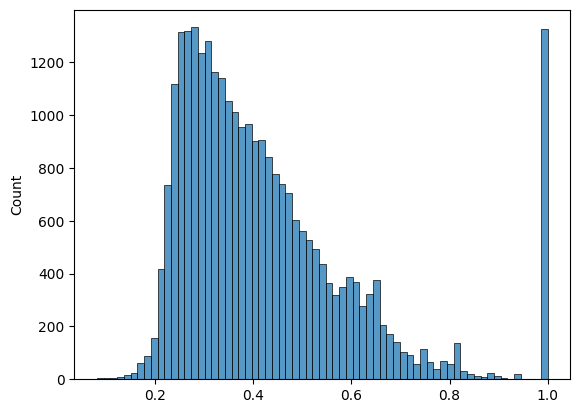

In [35]:
radi = list(range(1, 35))
teams = []
choices = [0, 1]
team_distances = []
for inv1 in list(g_colab.nodes):

    paths = nx.single_source_shortest_path_length(g_colab, inv1)
    team = []
    team.append(inv1)

    for radius in radi:

        radius_paths = [k for k,v in paths.items() if v == radius]

        for inv2  in radius_paths:

            choice = np.random.choice(choices, p=[(1 - conditional[radius-1]), conditional[radius-1]])

            if choice == 1:

                team.append(inv2)

    if len(team) > 1:

        teams.append(team)

for team in teams:

    distances = []

    for (inv1, inv2) in combinations(team, 2):

        inv1_skills = np.array([section_counts.loc[inv1]])
        inv2_skills = np.array([section_counts.loc[inv2]])

        inv1_skills[inv1_skills > 0 ] = 1
        inv2_skills[inv2_skills > 0 ] = 1

        average = MeasureDist(inv1_skills, inv2_skills, adj_tech)
        distances.append(average)

    patent_distance = np.nanmean(distances)
    team_distances.append(patent_distance)

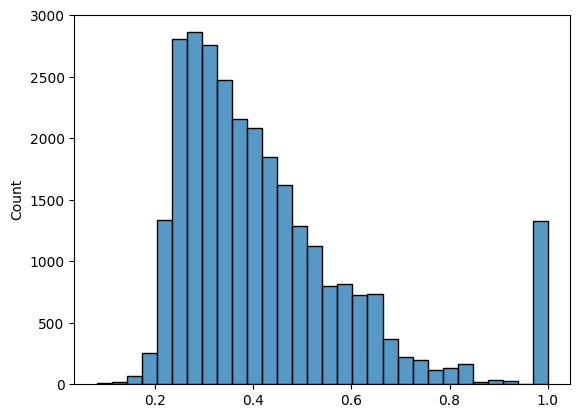

In [36]:
sns.histplot(team_distances, bins=30)
plt.show()

In [37]:
np.mean([len(t) for t in teams])

2.33753698745949

C:\Users\Joe's PC\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:509: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  scout = self.ax.fill_between([], [], color=color, **plot_kws)
C:\Users\Joe's PC\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:555: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  artists = plot_func(
C:\Users\Joe's PC\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:509: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  scout = self.ax.fill_between([], [], color=color, **p

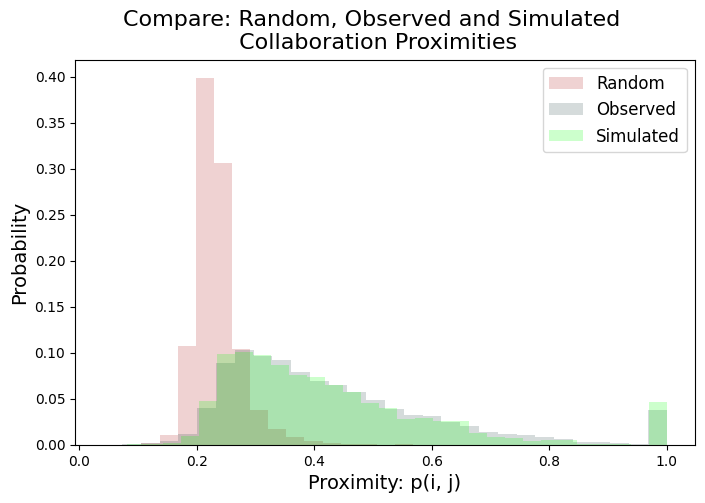

In [57]:
random_distances = pickle.load(open("random distances All.p", "rb"))

fig, ax = plt.subplots(facecolor="w", figsize=(8,5))
plt.suptitle("Compare: Random, Observed and Simulated \n Collaboration Proximities", fontsize=16)
sns.histplot(random_distances, color="firebrick", stat="probability", ax=ax, bins=30, alpha=0.2, edgecolor="", label="Random")
sns.histplot(observed_distances["inventor_distance"], color="darkslategray", stat="probability",
             ax=ax, bins=30, alpha=0.2, edgecolor="", label="Observed")
sns.histplot(team_distances, bins=30,  alpha=0.2,edgecolor="",  color="lime", stat="probability",label="Simulated", ax=ax)
plt.xlabel("Proximity: p(i, j)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(fontsize="large")
#fig.savefig("Random vs Observed All.png", dpi=300)
plt.show()

fig.savefig("Random and Simlauted proximities.png", dpi=300)



